1. Sample $10^4$ points uniformly over the hypercube $[0,1]^d$ (denote this set by $\mathcal X$).
2. For $d\in\{1,2,3,5,10,20,50,100,500\}$ and for the Euclidean distance $\rho$ find
- $\min d(x,\tilde x)$: minimum over $x,\tilde x\in \mathcal X$
- $\overline{d(x,\tilde x)}$: average over $x,\tilde x\in \mathcal X$
- $\max d(x,\tilde x)$: maximum over $x,\tilde x\in \mathcal X$
- $\overline{d_{NN1}(x)}$: average distance to the nearest neighbor
- $ \max d_{NN1}(x)$: maximal distance to the nearest neigbor 

Collect the results in a table

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

n = 10**4
ad = [1, 2, 3, 5, 10, 20, 50, 100, 500]
df = pd.DataFrame( columns = ['d', 'min d', 'average', 'max d', 'average distance', 'max distance'] )

for d in ad:
    x = np.random.uniform( 0, 1, (n, d) )
    ed = euclidean_distances( x, x )
    ed = np.sort(ed)
    ed = ed[ :, 1: ]
    
    min = ed.min()
    max = ed.max()
    mean = ed.mean()
    near = np.amin(ed, axis=1).mean()
    max_near = np.amin(ed, axis=1).max()
    
    df = df.append ({
        'd': d,
        'min d': min,
        'max d': max,
        'average': mean,
        'average distance': near, 
        'max distance': max_near
    }, ignore_index = True ) #без игнора индекса почему-то ошибка

print(df)

       d         min d   average      max d  average distance  max distance
0    1.0  2.356080e-08  0.334875   0.999800          0.000051      0.000484
1    2.0  2.026486e-05  0.518040   1.393512          0.005071      0.021532
2    3.0  1.264493e-03  0.659316   1.676954          0.026118      0.068748
3    5.0  2.040686e-02  0.878278   1.957788          0.109564      0.240904
4   10.0  1.266138e-01  1.266436   2.492786          0.386520      0.600113
5   20.0  5.627184e-01  1.812005   3.052750          0.897503      1.193366
6   50.0  1.551161e+00  2.876355   4.180891          1.971040      2.363486
7  100.0  2.738319e+00  4.074594   5.406003          3.181919      3.523575
8  500.0  7.780282e+00  9.125127  10.470979          8.248755      8.651634


In [ ]:
#----------------------------------------------------------------------------

3. Generate $10^4$ point such that each point with probability $1/2$
- is sampled from $N(\mu,I)$, $\mu=(a,\dots,a)\in\mathbb R^d$ and gets label $0$
- is sampled from $N(\mu,I)$, $\mu=(-a,\dots,-a)\in\mathbb R^d$ and gets label $1$

Put $a=\frac{2}{\sqrt{d}}$ (the Bayes error will be $\approx 0.023$ for all $d$). 

For $k = 3, 7, 15$  train a $k$-NN classifier for increasing dimensions $1\le d\le 500$ and monitor its performance evaluated by 10 times repeated 10-fold CV. For each $k$ draw the graphs of the mean  missclassification error as a function of $d$.

100%|██████████████████████████████████████████████████████| 5/5 [10:43<00:00, 128.69s/it]


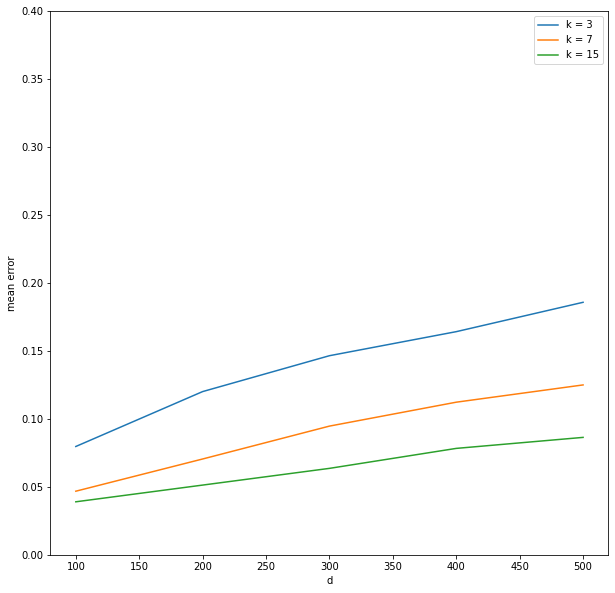

In [24]:
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

ak = [3, 7, 15]
ad = [100, 200, 300, 400, 500] #при попытке добавить больше пяти элементов вылезает ошибка
np.random.seed(42)

fig, ax = plt.subplots( 1, 1, figsize = (10, 10) )
plt.ylim([0, 0.4])
ax.set_xlabel('d')
ax.set_ylabel('mean error')

for k in ak:
    
    temp = []
    
    for d in tqdm( ad ):
        
        a = [ 2 / np.sqrt(d) for i in range(d) ]
        el = np.random.randn(n, d)
        x0 = el + a
        x1 = el - a
        y = np.zeros((n, d)) + np.random.randint( 0, 2, (n, 1) )
        x = x0 * ( y == 1 ) + x1 * ( y == 0)
        
        knc = KNeighborsClassifier( n_neighbors = k )
        cvs = cross_val_score( knc, x, y, cv = 10 )
        temp.append( np.mean( 1 - cvs ) )
    strk = str(k)
    ax.plot( ad, temp, label = 'k = ' + strk )
    ax.legend( loc = 0 )
        
        
plt.show()